E-Commerce Website Data Analysis
 Exploratory Data Analysis [EDA]ionr product.

In [17]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# visualization
import seaborn as sns
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/AnudipAE/DANLC/master/cleaned.csv')
# list of first five rows
dataset.head()


item_id  user_id  rating  timestamp  gender    category    brand  year  \
0        7      131       4      36692  Female  Home Audio  Philips  2000   
1       19      231       5      36891  Female      Camera    Canon  2000   
2       14      233       5      36893  Female      Camera    Kodak  2001   
3       14      257       5      36926  Female      Camera    Kodak  2001   
4       14      269       5      36952  Female      Camera    Kodak  2001   

   month  quantity  unitprice  amount  
0      6         5       6360   31800  
1     12        10       9955   99550  
2      1         9       7639   68751  
3      2         7       5097   35679  
4      3        10       6472   64720

In [11]:
# list of last five rows
dataset.tail()


item_id  user_id  rating  timestamp  gender    category       brand  \
45161     7828  1157458       5      43341  Female  Headphones        Bose   
45162     8624  1157504       5      43342  Female  Headphones        Pyle   
45163     9513  1157527       5      43344    Male  Headphones        Mpow   
45164     9125  1157555       3      43348  Female  Headphones      EldHus   
45165     9478  1157632       1      43374  Female  Headphones  Etre Jeune   

       year  month  quantity  unitprice  amount  
45161  2018      8         7       5925   41475  
45162  2018      8         7       9717   68019  
45163  2018      9         8       9197   73576  
45164  2018      9        10       8848   88480  
45165  2018     10         7       7717   54019

In [13]:
# shape
dataset.shape


(45166, 12)

In [15]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [17]:
dataset['rating'].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [19]:
dataset.nunique()


item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [21]:
# check for missing values
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

<Axes: title={'center': 'Year Wise Sales'}, xlabel='year'>

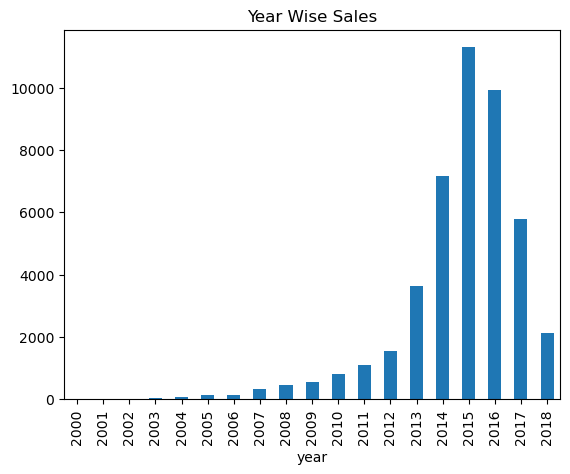

In [25]:
# what was the best year of sales
dataset.groupby('year')['amount'].count().plot(kind='bar',title='Year Wise Sales')


<Axes: xlabel='month'>

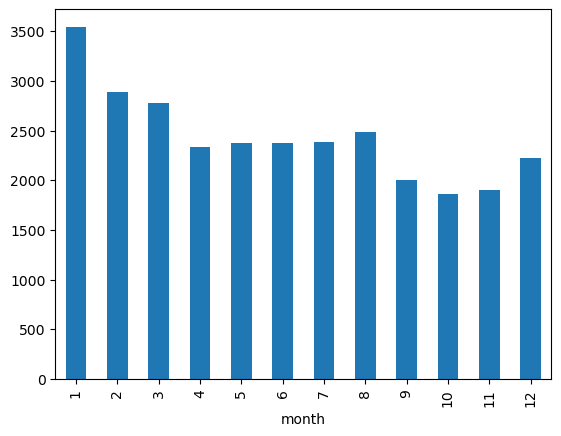

In [27]:
# We can see that the year 2015 to 2018 had the best sales.
# what was the best month of sales
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']
<= 2018)]
dataset_2015_2018.groupby('month')['rating'].count().plot(kind='bar')

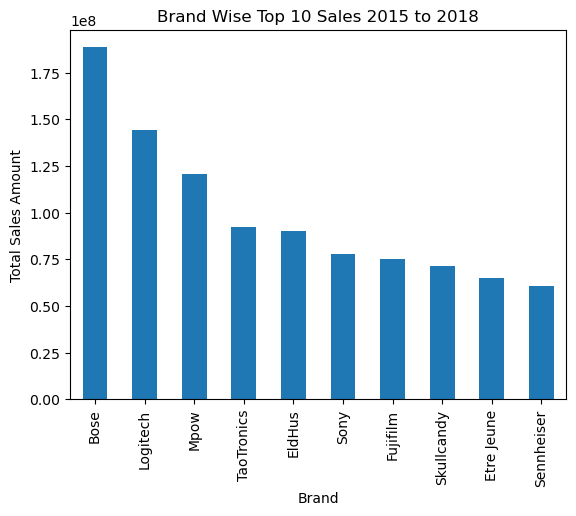

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset is already defined
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand and sum the amount, then sort and select the top 10
top_brands = dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=False).head(10)

# Plotting
top_brands.plot(kind='bar', title='Brand Wise Top 10 Sales 2015 to 2018')
plt.ylabel('Total Sales Amount')
plt.xlabel('Brand')
plt.show()


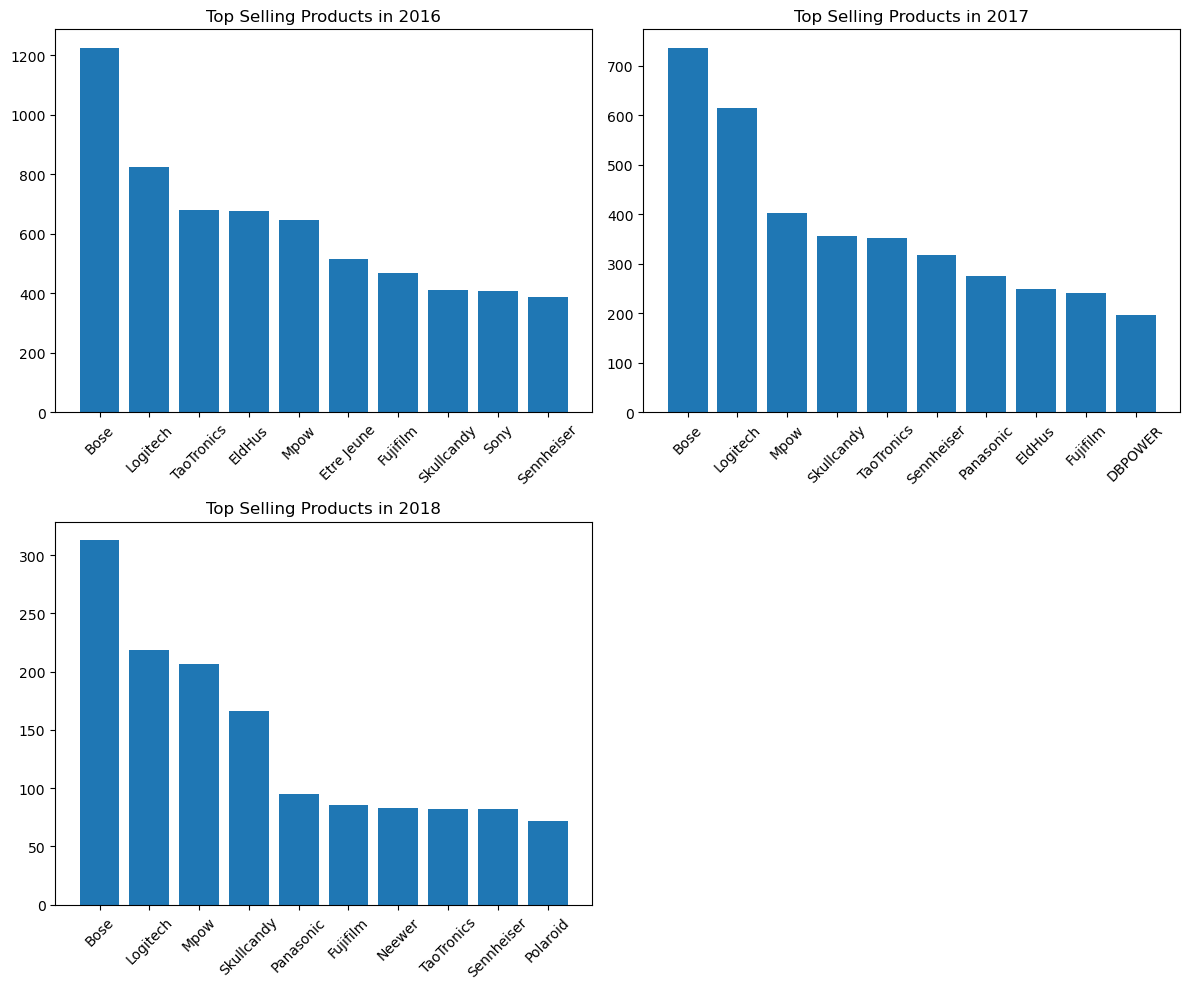

In [61]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot for 2016
top_selling_2016 = dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_selling_2016.index, top_selling_2016)
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2017
top_selling_2017 = dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_selling_2017.index, top_selling_2017)
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2018
top_selling_2018 = dataset[dataset['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].bar(top_selling_2018.index, top_selling_2018)
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Hide the empty subplot
axs[1, 1].axis('off')
# Adjust layout for better appearance
plt.tight_layout()
# Show the plots
plt.show()


<Axes: title={'center': 'Top 10 Most Sold ProductCategory 2015 to 2018'}, xlabel='category'>

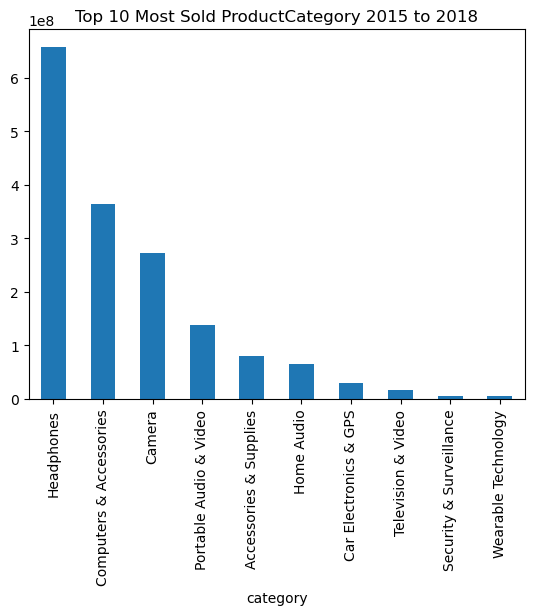

In [63]:
# # What product by category sold the most between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Most Sold ProductCategory 2015 to 2018')

<Axes: title={'center': '10 Least Sold Product Brand2015 to 2018'}, xlabel='category'>

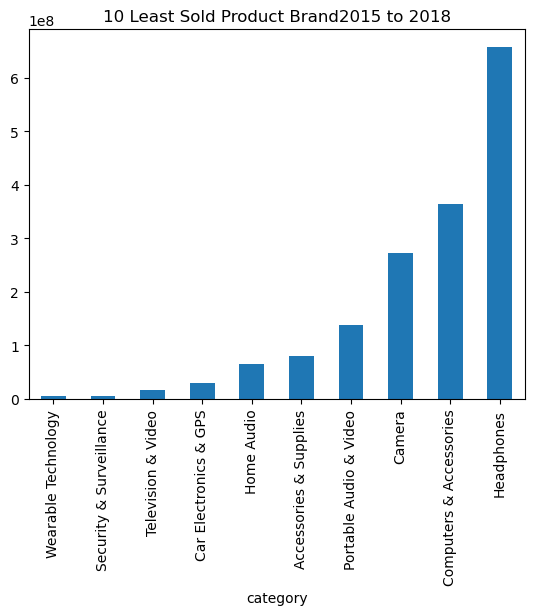

In [65]:
# What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand2015 to 2018')

<Axes: title={'center': '10 Least Sold Product Brand 2015to 2018'}, xlabel='brand'>

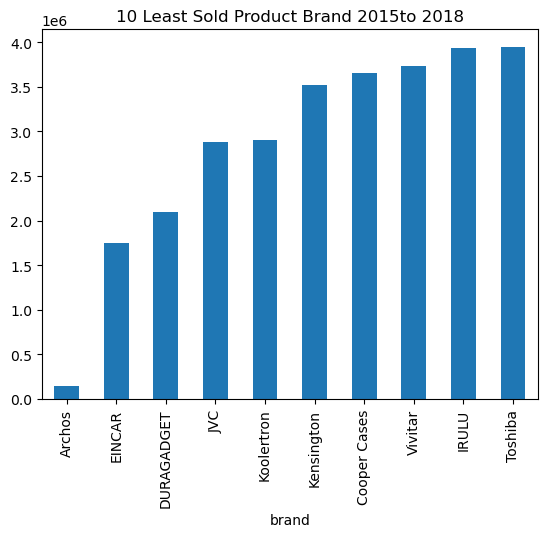

In [67]:
# What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015to 2018')


<Axes: xlabel='rating', ylabel='count'>

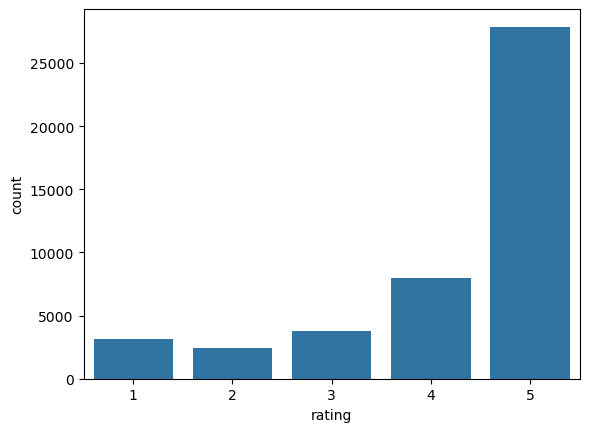

In [69]:
# the distribution of ratings
sns.countplot(x='rating', data=dataset)

<Axes: title={'center': '10 most rating Brand 2015 to2018'}, xlabel='brand'>

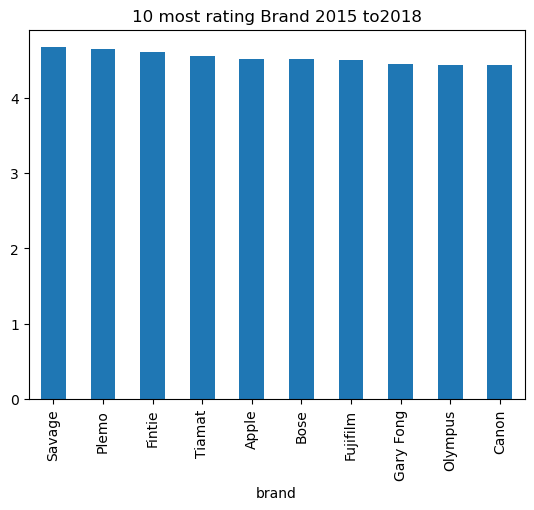

In [71]:
# What is the most rated brand name between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to2018')

<Axes: title={'center': 'Top 5 category salespercentage'}, ylabel='amount'>

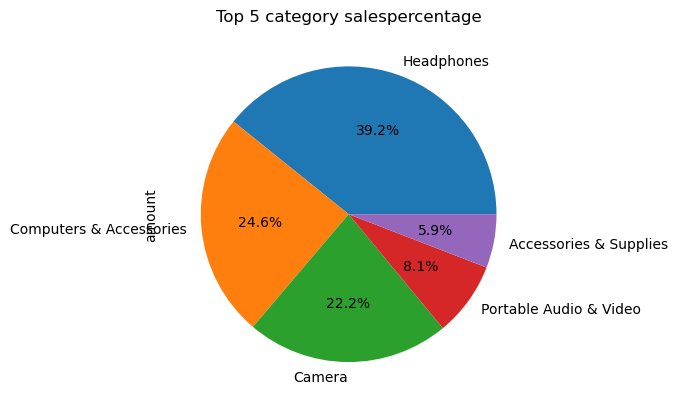

In [73]:
# category percentage sales
dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 category salespercentage')

<Axes: title={'center': 'Top 5 Brand wise salespercentage'}, ylabel='rating'>

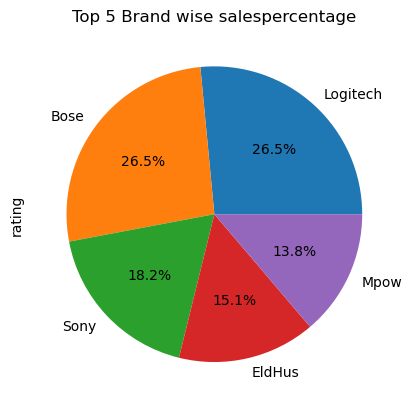

In [24]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise salespercentage')

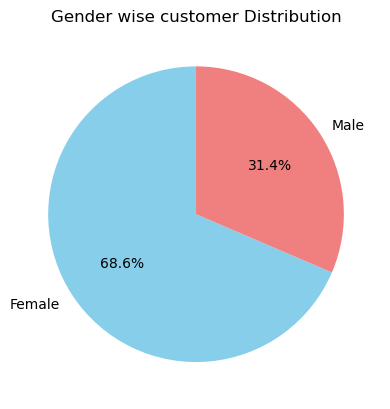

In [77]:
# Gender wise customer distribution
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()

#Conclusion:
2015 emerged as the peak year for sales and profits.
Headphones led sales, followed closely by Computer and Accessories, while Security & Surveillance recorded the lowest sales.
Sales exhibited a consistent increase from 2007 to 2015, followed by a significant decline from 2016 to 2018.
The brand Bose achieved the highest sales, with Logitech in second place.
Conversely, Archos had the lowest sales, closely followed by EINCAR.
The majority of products received a rating of 5 stars.
The top-rated brands were Savage and Plemo.